# Correlation between entropy metrics

Requires the [seaborn](https://seaborn.pydata.org/) and [pingouin](https://raphaelvallat.github.io/pingouin/build/html/index.html) packages.

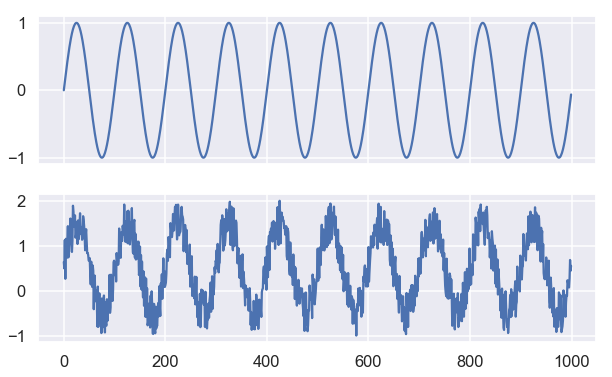

In [1]:
from entropy import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(context='talk')

df = pd.DataFrame()

# Generate 1000 1Hz sines with increasing noise
np.random.seed(123)
N = 1000
sf = 100
n_sines = 100
noises_factor = np.linspace(0, 1, n_sines)
noises = np.random.rand(n_sines, N)
sines = np.zeros(shape=(n_sines, N))
for i in range(n_sines):
    sines[i] = np.sin(2 * np.pi * np.arange(N) / sf) + noises_factor[i] * noises[i, :]
    
# Plot the first and last sines
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True, sharey=False)
ax1.plot(sines[0])
ax2.plot(sines[-1])

In [2]:
# Compute the entropy metrics
for i in range(n_sines):
    df = df.append({'perm_ent': perm_entropy(sines[i], order=3, normalize=True),
                        'svd_ent' : svd_entropy(sines[i], order=3, normalize=True),
                        'spec_ent' : spectral_entropy(sines[i], sf, method='welch', normalize=True),
                        'app_ent': app_entropy(sines[i], order=2),
                        'samp_ent': sample_entropy(sines[i], order=2),
                       }, 
                       ignore_index=True)

df

,app_ent,perm_ent,samp_ent,spec_ent,svd_ent
0,0.200446,0.447237,0.163998,0.184779,0.177294
1,0.201632,0.482647,0.164015,0.184847,0.192173
2,0.203127,0.536770,0.165197,0.184923,0.204147
3,0.211145,0.610048,0.168862,0.185038,0.213686
4,0.224220,0.625656,0.175752,0.185502,0.224054
5,0.233322,0.678376,0.179516,0.185815,0.233240
6,0.244138,0.722438,0.186753,0.186331,0.242270
7,0.255464,0.785273,0.196414,0.186716,0.256032
8,0.260081,0.845586,0.201311,0.187403,0.262959
9,0.265647,0.864563,0.206286,0.187987,0.274326


## Pairwise correlations

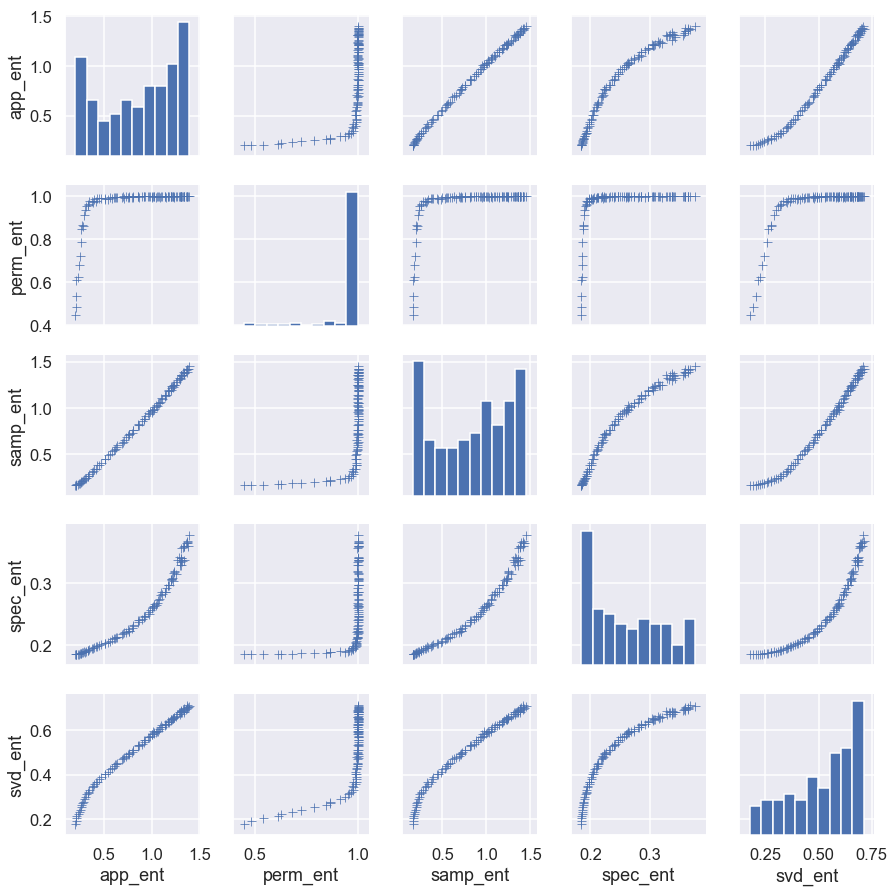

In [3]:
sns.pairplot(df, markers='+')

In [4]:
from pingouin import pairwise_corr
pairwise_corr(df).sort_values(by=['r2'], ascending=False)

,X,Y,method,tail,r,CI95%,r2,adj_r2,z,p-unc,BF10
1,app_ent,samp_ent,pearson,two-sided,0.999,"[1.0, 1.0]",0.998,0.998,3.800,6.866553e-131,4.646135e+126
3,app_ent,svd_ent,pearson,two-sided,0.991,"[0.99, 0.99]",0.983,0.983,2.700,2.248765e-88,3.879040e+84
8,samp_ent,svd_ent,pearson,two-sided,0.986,"[0.98, 0.99]",0.971,0.971,2.477,1.831064e-77,6.189555e+73
7,samp_ent,spec_ent,pearson,two-sided,0.967,"[0.95, 0.98]",0.935,0.934,2.044,6.024500e-60,2.889894e+56
2,app_ent,spec_ent,pearson,two-sided,0.956,"[0.94, 0.97]",0.914,0.912,1.897,5.063588e-54,3.993255e+50
9,spec_ent,svd_ent,pearson,two-sided,0.925,"[0.89, 0.95]",0.856,0.853,1.623,5.795841e-43,4.663837e+39
6,perm_ent,svd_ent,pearson,two-sided,0.679,"[0.56, 0.77]",0.461,0.450,0.827,8.109499e-15,8.564793e+11
0,app_ent,perm_ent,pearson,two-sided,0.583,"[0.44, 0.7]",0.340,0.326,0.667,1.968302e-10,4.493042e+07
4,perm_ent,samp_ent,pearson,two-sided,0.557,"[0.4, 0.68]",0.310,0.296,0.628,1.822871e-09,5.175073e+06
5,perm_ent,spec_ent,pearson,two-sided,0.445,"[0.27, 0.59]",0.198,0.181,0.478,3.588625e-06,3.472729e+03


***
- The approximate entropy, SVD entropy and sample entropy are highly correlated (= very high collinearity of these three features).
- The permutation entropy is the least correlated with all the other features.

## Clustermap

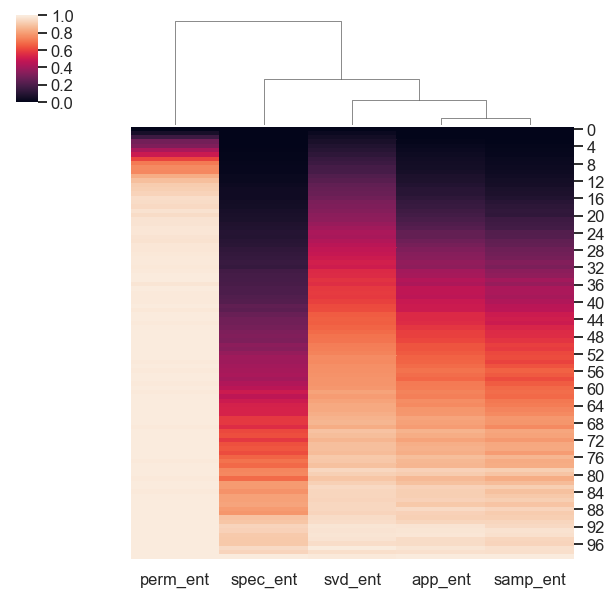

In [5]:
sns.clustermap(df, row_cluster=False, standard_scale=1)